In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.tree import plot_tree
import seaborn as sns 
from sklearn import model_selection

In [7]:
os.getcwd()

'/Users/shubhamgoyal/Downloads/DataSciece19098'

In [94]:
ls

sample_submission.csv      test.csv.zip
sample_submission.csv.zip  train.csv
test.csv                   train.csv.zip


In [12]:
os.chdir('prudential-life-insurance-assessment/')

In [13]:
ls

sample_submission.csv      test.csv.zip
sample_submission.csv.zip  train.csv
test.csv                   train.csv.zip


In [23]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [24]:
train_data=train_data.set_index('Id')
test_data=test_data.set_index('Id')

In [25]:
train_data.shape,test_data.shape

((59381, 127), (19765, 126))

In [21]:
train_df.shape

(59381, 128)

In [26]:
pd.set_option('display.max_columns', 500)
train_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2

In [27]:
#numeric and categorical columns as mentioned on data page (kaggle competition)

cat_cols=['Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_5','Product_Info_6','Product_Info_7',
'Employment_Info_2','Employment_Info_3','Employment_Info_5','InsuredInfo_1','InsuredInfo_2','InsuredInfo_3',
'InsuredInfo_4','InsuredInfo_5','InsuredInfo_6','InsuredInfo_7','Insurance_History_1','Insurance_History_2',
'Insurance_History_3','Insurance_History_4','Insurance_History_7','Insurance_History_8','Insurance_History_9',
'Family_Hist_1','Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_5',
'Medical_History_6','Medical_History_7',
'Medical_History_8','Medical_History_9','Medical_History_11','Medical_History_12','Medical_History_13',
'Medical_History_14','Medical_History_16','Medical_History_17','Medical_History_18','Medical_History_19',
'Medical_History_20','Medical_History_21','Medical_History_22','Medical_History_23','Medical_History_25',
'Medical_History_26','Medical_History_27','Medical_History_28','Medical_History_29','Medical_History_30',
'Medical_History_31','Medical_History_33','Medical_History_34','Medical_History_35','Medical_History_36',
'Medical_History_37','Medical_History_38','Medical_History_39','Medical_History_40','Medical_History_41'w]

# dummy_vars=

# num_cols = train_data._get_numeric_data().columns

# print(num_cols)

num_cols=list(set(train_data.columns) - set(cat_cols))
# num_cols

In [28]:
#checking columns with missing values
percent_missing = train_data.isna().sum() * 100 / len(train_data)
missing_value_df = pd.DataFrame({'column_name': train_data.columns,
                                 'percent_missing': percent_missing})

In [29]:
missing_value_df[missing_value_df.percent_missing>0]

,column_name,percent_missing
Employment_Info_1,Employment_Info_1,0.031997
Employment_Info_4,Employment_Info_4,11.416110
Employment_Info_6,Employment_Info_6,18.278574
Insurance_History_5,Insurance_History_5,42.767889
Family_Hist_2,Family_Hist_2,48.257860
Family_Hist_3,Family_Hist_3,57.663226
Family_Hist_4,Family_Hist_4,32.306630
Family_Hist_5,Family_Hist_5,70.411411
Medical_History_1,Medical_History_1,14.969435
Medical_History_10,Medical_History_10,99.061990


In [30]:
missing_cols=missing_value_df[missing_value_df.percent_missing>0].index
missing_cols

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_10', 'Medical_History_15', 'Medical_History_24',
       'Medical_History_32'],
      dtype='object')

In [31]:
# The above listed variables have been identified having missing values, while there are some variables which have
# very low missing percentage, majority of them have very high missing rates which can be dropped as 
# high imputation might cause change in the distributions. I'll be dropping variables with >40% missing rates
# and imputing missing values for other variables using iterative imputation method

In [32]:
del_cols_missing = ['Insurance_History_5','Family_Hist_2', 'Family_Hist_3', 'Family_Hist_5',
                    'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

train_data_upd= train_data.drop(del_cols_missing,axis=1)
test_data_upd=test_data.drop(del_cols_missing,axis=1)


In [36]:
impute_cols = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
                 'Family_Hist_4','Medical_History_1']

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# creating a subset of train and test where imputation is required
train_data_pre_imp= train_data_upd[impute_cols]
test_data_pre_imp=test_data_upd[impute_cols]

#data set with remaining variables
train_data_rem = train_data_upd.drop(impute_cols, axis=1)
test_data_rem = test_data_upd.drop(impute_cols, axis=1)

imputer = IterativeImputer(random_state=0)

# imputing values
train_data_post_imp= pd.DataFrame(imputer.fit_transform(train_data_pre_imp), columns=impute_cols)
test_data_post_imp= pd.DataFrame(imputer.fit_transform(test_data_pre_imp), columns=impute_cols)

# ensuring index doesn't change
train_data_post_imp.index = train_data_pre_imp.index
test_data_post_imp.index = test_data_pre_imp.index

# Re-joining the imputed columns with the remaining columns in each dataset
train_data_imp = pd.concat([train_data_rem, train_data_post_imp], axis=1)
test_data_imp = pd.concat([test_data_rem, test_data_post_imp], axis=1)


In [43]:
train_data_imp.shape,test_data_imp.shape

((59381, 119), (19765, 118))

In [44]:
#checking missing values again

percent_missing = train_data_imp.isna().sum() * 100 / len(train_data_imp)
missing_value_df = pd.DataFrame({'column_name': train_data_imp.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df.percent_missing>0]

,column_name,percent_missing


In [45]:
train_data[impute_cols].describe()

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_4,Medical_History_1
count,59362.000000,52602.000000,48527.000000,40197.000000,50492.000000
mean,0.077582,0.006283,0.361469,0.444890,7.962172
std,0.082347,0.032816,0.349551,0.163012,13.027697
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000,0.323944,2.000000
50%,0.060000,0.000000,0.250000,0.422535,4.000000
75%,0.100000,0.000000,0.550000,0.563380,9.000000
max,1.000000,1.000000,1.000000,0.943662,240.000000


In [46]:
train_data_imp[impute_cols].describe()
#distributions are not affected much with the imputations

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_4,Medical_History_1
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,0.077583,0.006301,0.347528,0.453762,8.020663
std,0.082335,0.030961,0.325838,0.142332,12.020361
min,0.000000,-0.005676,-0.230829,0.000000,0.000000
25%,0.035000,0.000000,0.080000,0.366197,2.000000
50%,0.060000,0.000000,0.250000,0.440202,5.000000
75%,0.100000,0.000000,0.500000,0.549296,9.044058
max,1.000000,1.000000,2.140545,1.006113,240.000000


In [47]:
num_cols_upd=list(set(train_data_imp.columns) - set(cat_cols))

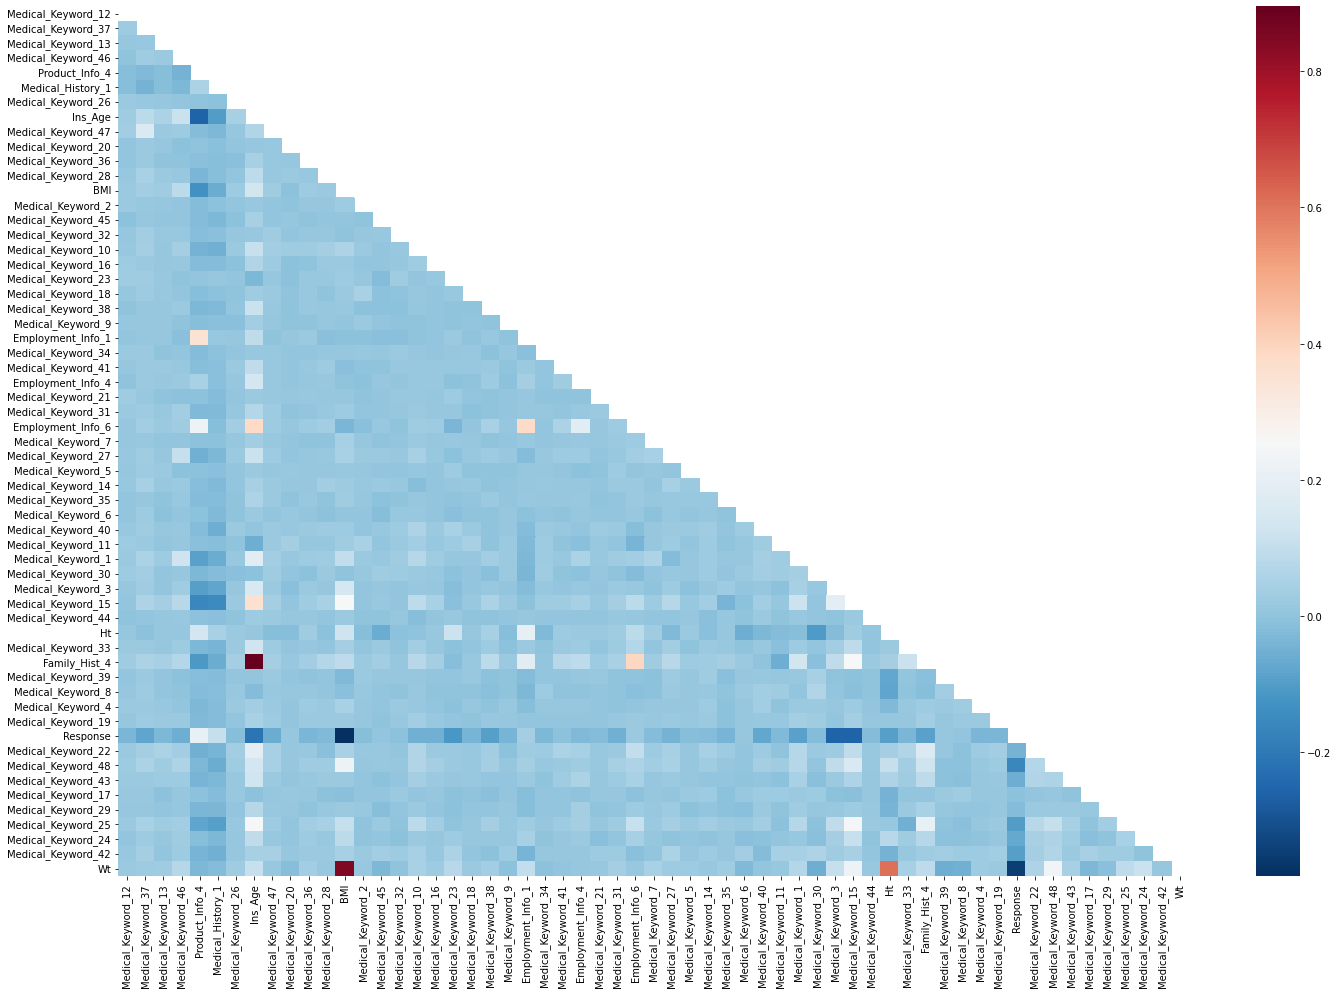

In [48]:
#conducting an initial check on correlation between variables
import seaborn as sns
import numpy as np

corrs = train_data[num_cols_upd].corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

# Convert the correlation matrix into a heatmap using Seaborn.
plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r', mask=mask)
plt.show()

# we can observe high positive correlation between Ins_age and Family_hist_4, and Wt & BMI

#there is negative correlation between response and bmi 

In [49]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

vif_data = pd.DataFrame()
vif_data["feature"] = train_data_imp[num_cols_upd].columns
vif_data["VIF"] = [variance_inflation_factor(train_data_imp[num_cols_upd].values, i) for i in range(len(train_data_imp[num_cols_upd].columns))]

In [50]:
vif_data[vif_data.VIF>10].sort_values('VIF',ascending=False)
#high vif indicates high correlation with other variables, here we can observe wt, BMI, ht etc have high vif
# values and hence have high correlation which makes intuitive sense as well.

,feature,VIF
58,Wt,73.650012
12,BMI,57.805404
42,Ht,53.498149
44,Family_Hist_4,25.245154
7,Ins_Age,13.432020


In [51]:
#one hot encoding product_info_2 var as it is string categorical variable

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
col_enc = ['Product_Info_2']

# Use the one-hot encoder to transform the categorical data columns. 
train_data_enc = pd.DataFrame(OH_encoder.fit_transform(train_data_imp[col_enc]))
test_data_enc = pd.DataFrame(OH_encoder.transform(test_data_imp[col_enc]))

#reassigning the original index.
train_data_enc.index = train_data_imp.index
test_data_enc.index = test_data_imp.index

# Addings columns as per the encoding 
train_data_enc.columns = OH_encoder.get_feature_names(col_enc)
test_data_enc.columns = OH_encoder.get_feature_names(col_enc)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
train_data_no_enc = train_data_imp.drop(col_enc, axis=1)
test_data_no_enc = test_data_imp.drop(col_enc, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
train_data_imp_enc = pd.concat([train_data_no_enc, train_data_enc], axis=1)
test_data_imp_enc = pd.concat([test_data_no_enc, test_data_enc], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
print(train_data_imp.shape,train_data_imp_enc.shape)
print(test_data_imp.shape,test_data_imp_enc.shape)

(59381, 119) (59381, 137)
(19765, 118) (19765, 136)


In [53]:
train_data_imp_enc.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_4,Medical_History_1,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,12,1,3,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.028,0.0,0.261318,0.436869,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,1,3,2,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.000,0.0,0.001800,0.084507,5.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,9,1,2,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.030,0.0,0.030000,0.225352,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,9,1,3,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.042,0.0,0.200000,0.35211

In [54]:
#mutual information test for choosing important variables

from sklearn.feature_selection import mutual_info_classif

def mut_info_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [55]:
mi_scores_train = mut_info_scores(train_data_imp_enc.drop('Response',axis=1), train_data_imp_enc['Response'])


In [56]:
mi_scores_train

BMI                   0.221119
Wt                    0.153992
Medical_History_4     0.081211
Medical_History_23    0.079077
Medical_Keyword_15    0.077225
                        ...   
Medical_Keyword_32    0.000000
Medical_Keyword_33    0.000000
Medical_Keyword_35    0.000000
Medical_Keyword_36    0.000000
Medical_Keyword_5     0.000000
Name: MI Scores, Length: 136, dtype: float64

In [57]:
#from an initial test of mutual information we can observe that BMI, Wt, Medical_History_4 and Medical_Keyword_23
# have dependencies with the response variable and can add significant statiscal value in prediction.

In [58]:
train_data_imp_enc.Response.value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

## Feature Engineering

In [189]:


#Count of all medical keywords for a row
med_keyword_columns = train_data_imp_enc.columns[train_data_imp_enc.columns.str.startswith('Medical_Keyword_')]
train_data_imp_enc['Med_Keywords_Count'] = train_data_imp_enc[med_keyword_columns].sum(axis=1)
test_data_imp_enc['Med_Keywords_Count'] = test_data_imp_enc[med_keyword_columns].sum(axis=1)

#BMI*AGE
train_data_imp_enc['BMI_Age'] = train_data_imp_enc['BMI'] * train_data_imp_enc['Ins_Age']
test_data_imp_enc['BMI_Age'] = test_data_imp_enc['BMI'] * test_data_imp_enc['Ins_Age']

In [60]:
print(train_data_imp.shape,train_data_imp_enc.shape)
print(test_data_imp.shape,test_data_imp_enc.shape)

(59381, 119) (59381, 139)
(19765, 118) (19765, 138)


In [61]:
train_data_imp_enc.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_4,Medical_History_1,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Med_Keywords_Count,BMI_Age
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_data_imp_enc.Response=le.fit_transform(train_data_imp_enc.Response)

In [125]:
(train_data_imp_enc.Response.value_counts()/train_data_imp_enc.shape[0])*100

7    32.820262
5    18.916825
6    13.517792
1    11.033832
0    10.452838
4     9.147707
3     2.404810
2     1.705933
Name: Response, dtype: float64

<AxesSubplot:xlabel='Response', ylabel='count'>

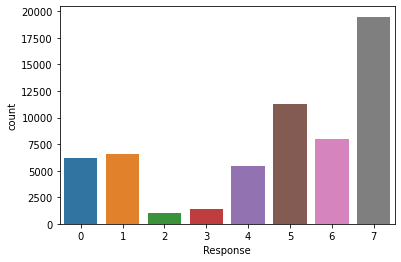

In [122]:
sns.countplot(x=train_data_imp_enc.Response)

In [100]:
#splitting data into train-test groups

X=train_data_imp_enc.drop('Response',axis=1)
y=train_data_imp_enc['Response']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state= 1,stratify=y)

## XGBClassifier

In [161]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'multi:softmax',
    nthread=4,
    seed=42
)

xgb_parameters = {
    'max_depth': range (4, 8, 2),
    'n_estimators': [100],
    'learning_rate': [0.1, 0.01, 0.05]
}


xgb_grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=xgb_parameters,
    scoring = 'accuracy',
    cv = 5,
    verbose=3
)


xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.541 total time=  35.4s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.538 total time=  41.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.536 total time=  44.7s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.546 total time=  45.9s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.545 total time=  47.5s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.547 total time= 1.2min
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.542 total time= 1.3min
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.541 total time= 1.2min
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.550 total time= 1.3min
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.546 total tim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [164]:
# examine the best model


# best score achieved during the GridSearchCV (Takes the mean of all the CV folds) 
print('GridSearch CV best score : {:.4f}\n\n'.format(xgb_grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (xgb_grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (xgb_grid_search.best_estimator_))

# acc_train = rf_optimal_model.score(X_train,Y_train)
print('Accuracy of trained model:',xgb_grid_search.score(X_train,y_train))

GridSearch CV best score : 0.5451


Parameters that give the best results : 

 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


Estimator that was chosen by the search : 

 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=42, ...)
Accuracy of trained model: 0.6108748736948467


In [165]:
y_pred_xgb=xgb_grid_search.predict(X_test)
# pd.set_option('display.max_rows', 500)
import sys
np.set_printoptions(threshold=sys.maxsize)

unique, counts = np.unique(y_pred_xgb, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0  624]
 [   1  733]
 [   2   36]
 [   3   99]
 [   4  932]
 [   5 2783]
 [   6 1271]
 [   7 5399]]


In [166]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.47      0.24      0.32      1241
           1       0.48      0.27      0.34      1310
           2       0.47      0.08      0.14       203
           3       0.42      0.15      0.22       286
           4       0.59      0.51      0.55      1086
           5       0.42      0.52      0.46      2247
           6       0.44      0.35      0.39      1606
           7       0.64      0.89      0.75      3898

    accuracy                           0.54     11877
   macro avg       0.49      0.38      0.40     11877
weighted avg       0.52      0.54      0.51     11877



In [167]:
hd=pd.DataFrame()
hd['Colname'] = list(X_train.columns)
hd['feature_imp']=xgb_grid_search.best_estimator_.feature_importances_
# hd.head()

hd.sort_values(by=['feature_imp'],inplace=True,ascending=False)
hd.head(20)
# for i, f in zip(hd, xgb_grid_search.best_estimator_.feature_importances_):
#      print(i,round(f*100,2))

,Colname,feature_imp
78,Medical_Keyword_15,0.091657
30,Medical_History_4,0.073230
47,Medical_History_23,0.061797
9,BMI,0.040119
66,Medical_Keyword_3,0.038199
2,Product_Info_4,0.021973
53,Medical_History_30,0.018760
62,Medical_History_40,0.017416
51,Medical_History_28,0.015603
136,Med_Keywords_Count,0.014905


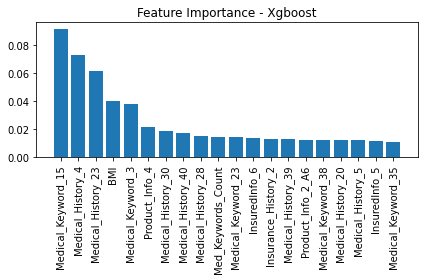

In [168]:
plt.title('Feature Importance - Xgboost')
plt.bar(hd.head(20)['Colname'], hd.head(20)['feature_imp'], align='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [133]:
xgb_grid_search.best_estimator_.feature_importances_

array([0.01074072, 0.00276368, 0.02197268, 0.00398058, 0.0030949 ,
       0.00358153, 0.00786795, 0.00280464, 0.00666571, 0.04011898,
       0.00604025, 0.        , 0.00337121, 0.00429061, 0.01078755,
       0.00342992, 0.0031636 , 0.01202317, 0.01409945, 0.01083271,
       0.00418864, 0.01326891, 0.00390153, 0.00549938, 0.00639414,
       0.00285089, 0.00235288, 0.00885342, 0.00299307, 0.00390527,
       0.07323027, 0.0122984 , 0.00468101, 0.00455667, 0.00341105,
       0.00267323, 0.00829152, 0.0033631 , 0.01031009, 0.00202664,
       0.00348526, 0.0065834 , 0.00953923, 0.00424498, 0.01231644,
       0.00311466, 0.00216809, 0.06179743, 0.00284651, 0.00173479,
       0.00772654, 0.01560266, 0.00288572, 0.01875958, 0.00624886,
       0.00724157, 0.0026558 , 0.00707218, 0.00352972, 0.00363336,
       0.00397627, 0.01323346, 0.01741553, 0.00335409, 0.00273165,
       0.0036581 , 0.03819877, 0.00294868, 0.00116559, 0.00410422,
       0.00246218, 0.0025644 , 0.00496093, 0.00295829, 0.00230

## XGBoostClassifier with Count:Poisson objective function

In [190]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'count:poisson',
    nthread=4,
    seed=42
)

xgb_parameters = {
    'max_depth': range (4, 8, 2),
    'n_estimators': [100],
    'learning_rate': [0.1, 0.01, 0.05]
}


xgb_grid_search_poison = GridSearchCV(
    estimator=estimator,
    param_grid=xgb_parameters,
    scoring = 'accuracy',
    cv = 5,
    verbose=3
)


xgb_grid_search_poison.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.541 total time=  32.0s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.538 total time=  36.2s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.536 total time=  39.5s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.546 total time=  41.5s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.545 total time=  42.9s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.547 total time= 1.1min
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.542 total time= 1.1min
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.541 total time= 1.1min
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.550 total time= 1.2min
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.546 total tim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [195]:
# examine the best model


# best score achieved during the GridSearchCV (Takes the mean of all the CV folds) 
print('GridSearch CV best score : {:.4f}\n\n'.format(xgb_grid_search_poison.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (xgb_grid_search_poison.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (xgb_grid_search_poison.best_estimator_))

GridSearch CV best score : 0.5451


Parameters that give the best results : 

 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


Estimator that was chosen by the search : 

 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42, ...)


In [196]:
#trying linear regression
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [197]:
y_pred_lm=lm.predict(X_test)
print(y_pred_lm)

[ 6.91418448e+00  5.66205049e+00  5.91244590e+00  4.06335740e+00
  5.43237180e+00  4.97776023e+00  4.91935657e+00  5.68824423e+00
  4.47783919e+00  1.78213564e+00  4.18706875e+00  3.06283592e+00
  6.32892528e+00  7.54709366e+00 -4.25961009e-01  5.84359600e+00
  5.77040235e+00  3.78332515e+00  5.14956249e+00  5.03296215e+00
  5.16134606e+00  3.40722108e+00  4.81536720e+00  6.88850061e+00
  6.16583325e+00  4.22626853e+00  1.37130804e+00 -1.02423037e+00
  4.47186073e+00  4.53278237e+00  6.72158278e+00  4.55241730e+00
  7.82838253e-01  4.39507202e+00  2.74469087e+00  3.28293658e+00
  4.90439029e+00  3.29625493e+00  4.55196057e+00  5.96577902e+00
  4.61015467e+00  4.31079385e+00  5.42011353e+00  5.68257206e+00
  5.41233819e+00  5.51865470e+00  3.63310619e+00  6.56129046e+00
  4.48247018e+00  1.41062481e+00  5.75879018e+00  4.89118224e+00
  2.92027997e+00  6.22686715e+00  5.53449955e+00  2.00238277e+00
  5.09163798e+00  2.21097864e+00  4.27043197e+00  5.34395136e+00
  4.64070985e+00  3.74287

In [198]:
y_pred_lm_cali=np.round(y_pred_lm).astype(int)

y_pred_lm_cali[y_pred_lm_cali<0]=0
y_pred_lm_cali[y_pred_lm_cali>7]=7

In [199]:
print(y_pred_lm_cali)

[7 6 6 4 5 5 5 6 4 2 4 3 6 7 0 6 6 4 5 5 5 3 5 7 6 4 1 0 4 5 7 5 1 4 3 3 5
 3 5 6 5 4 5 6 5 6 4 7 4 1 6 5 3 6 6 2 5 2 4 5 5 4 2 4 4 3 4 6 5 6 7 5 5 4
 6 7 4 5 5 4 4 7 4 6 5 7 7 5 5 5 5 1 4 3 2 3 5 4 5 6 5 5 3 6 4 4 3 4 4 5 6
 1 7 3 5 6 3 6 3 3 6 4 5 7 6 5 5 6 4 4 6 5 5 7 6 6 3 6 4 3 5 4 2 6 6 3 6 4
 6 5 3 7 5 5 5 3 5 3 6 5 5 5 4 1 2 5 6 6 5 5 5 7 3 5 2 4 2 1 6 3 6 3 6 7 6
 1 5 2 0 4 4 2 5 6 6 3 3 5 3 5 3 3 7 5 5 5 3 6 6 4 4 5 6 7 3 5 5 6 3 6 6 4
 7 6 3 6 4 4 5 6 3 4 6 3 5 6 5 2 4 5 4 4 4 6 6 6 2 4 3 5 4 4 5 4 6 4 4 4 5
 2 4 6 4 3 6 3 2 4 2 6 1 5 4 7 2 3 2 5 5 4 5 6 5 6 6 3 6 6 3 4 4 7 6 4 6 5
 5 6 4 3 5 4 5 6 6 4 4 6 5 6 6 5 5 6 3 6 6 6 6 5 1 5 4 5 5 6 3 5 6 5 3 5 3
 4 7 2 7 5 3 6 3 5 6 4 4 5 5 5 7 5 5 2 6 6 4 5 4 4 6 7 3 6 5 4 3 5 6 4 4 5
 5 2 4 6 6 4 6 5 4 4 5 6 5 4 3 5 5 5 5 5 6 4 5 5 3 5 5 4 5 7 5 2 6 4 5 2 3
 4 6 6 6 6 7 4 4 5 5 3 5 4 5 5 4 5 4 3 0 3 4 4 7 3 4 6 4 6 6 0 6 5 6 2 6 7
 6 1 5 5 4 5 5 2 4 3 5 5 5 5 4 5 0 4 5 5 5 3 5 3 6 5 3 7 5 4 5 4 7 5 5 5 5
 5 0 7 5 6 3 3 6 5 5 5 6 

In [200]:
unique, counts = np.unique(y_pred_lm_cali, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0  152]
 [   1  285]
 [   2  572]
 [   3 1287]
 [   4 2468]
 [   5 3485]
 [   6 2794]
 [   7  834]]


## XgboostRegressor

In [142]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

estimator = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)

xgb_parameters = {
    'max_depth': range (4, 8, 2),
    'n_estimators': [100],
    'learning_rate': [0.1, 0.01, 0.05]
}


xgb_grid_search_reg = GridSearchCV(
    estimator=estimator,
    param_grid=xgb_parameters,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose=3
)



xgb_grid_search_reg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=-3.636 total time=   4.2s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=-3.685 total time=   4.5s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=-3.742 total time=   4.7s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=-3.677 total time=   4.9s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=-3.641 total time=   5.0s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=-3.590 total time=   7.7s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=-3.640 total time=   7.9s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=-3.687 total time=   8.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=-3.620 total time=   8.3s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=-3.598

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                        

In [143]:
y_pred_xgb_reg=xgb_grid_search_reg.predict(X_test)
print(y_pred_xgb_reg)

[ 6.4990053e+00  6.3395700e+00  6.7835422e+00  3.3910871e+00
  5.3772612e+00  4.7158594e+00  5.6283002e+00  5.9967661e+00
  4.2078552e+00  1.0813793e+00  4.2255664e+00  4.2601328e+00
  6.6735506e+00  6.6763864e+00  1.5544434e+00  6.4476967e+00
  5.4134631e+00  4.2314215e+00  4.6688299e+00  5.3744631e+00
  4.8749080e+00  1.4199698e+00  5.0412340e+00  5.9046760e+00
  6.6920500e+00  3.8689039e+00  1.0013604e+00  5.4746151e-01
  4.3428774e+00  4.8791804e+00  6.5721998e+00  4.5800924e+00
  2.1706614e+00  5.0669804e+00  2.2775221e+00  1.8939192e+00
  4.7141714e+00  1.7895602e+00  4.4444294e+00  6.5148745e+00
  4.9494147e+00  4.3701239e+00  5.6740212e+00  5.6971307e+00
  5.9927316e+00  3.8775997e+00  3.8040667e+00  6.4528365e+00
  4.1760263e+00  1.9679440e+00  6.2859669e+00  5.7282786e+00
  3.8050263e+00  6.2469168e+00  5.0883985e+00  1.4697592e+00
  4.5865483e+00  2.1240852e+00  4.5911703e+00  5.9270535e+00
  5.9390583e+00  2.9407902e+00  2.7430687e+00  4.1253662e+00
  3.6199658e+00  2.32612

In [147]:
y_pred_xgb_reg_cali=np.round(y_pred_xgb_reg).astype(int)

y_pred_xgb_reg_cali[y_pred_xgb_reg_cali<0]=0
y_pred_xgb_reg_cali[y_pred_xgb_reg_cali>7]=7

In [148]:
unique, counts = np.unique(y_pred_xgb_reg_cali, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0   92]
 [   1  375]
 [   2  682]
 [   3 1395]
 [   4 2426]
 [   5 2842]
 [   6 3083]
 [   7  982]]


In [ ]:
# print('Accuracy of trained model:',xgb_grid_search.score(X_train,y_train))

In [152]:
print(classification_report(y_test,y_pred_xgb_reg_cali))

              precision    recall  f1-score   support

           0       0.65      0.05      0.09      1241
           1       0.49      0.14      0.22      1310
           2       0.03      0.09      0.04       203
           3       0.02      0.08      0.03       286
           4       0.16      0.35      0.22      1086
           5       0.27      0.34      0.30      2247
           6       0.15      0.29      0.20      1606
           7       0.87      0.22      0.35      3898

    accuracy                           0.23     11877
   macro avg       0.33      0.20      0.18     11877
weighted avg       0.49      0.23      0.25     11877



In [153]:
hd=pd.DataFrame()
hd['Colname'] = list(X_train.columns)
hd['feature_imp']=xgb_grid_search_reg.best_estimator_.feature_importances_
# hd.head()

hd.sort_values(by=['feature_imp'],inplace=True,ascending=False)
hd.head(20)
# for i, f in zip(hd, xgb_grid_search.best_estimator_.feature_importances_):
#      print(i,round(f*100,2))

,Colname,feature_imp
47,Medical_History_23,0.106326
30,Medical_History_4,0.087604
66,Medical_Keyword_3,0.074991
9,BMI,0.051917
62,Medical_History_40,0.026915
136,Med_Keywords_Count,0.020344
31,Medical_History_5,0.019239
131,Product_Info_2_D1,0.018727
21,Insurance_History_2,0.017692
17,InsuredInfo_5,0.017679


In [ ]:
plt.title('Feature Importance')
plt.bar(hd_20['Colname'], hd_20['feature_imp'], align='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_parameters = {
#     'criterion': ['entropy','gini'],
    'n_estimators': [50,75],
    'max_depth': [6,8,10],
#     'min_samples_split': [50,100],
#     'min_samples_leaf': [40,50]
}

rf_optimal_model = GridSearchCV(RandomForestClassifier(), rf_parameters, scoring = 'accuracy',cv = 5,verbose=3)
rf_optimal_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ......max_depth=6, n_estimators=50;, score=0.458 total time=   0.9s
[CV 2/5] END ......max_depth=6, n_estimators=50;, score=0.466 total time=   0.8s
[CV 3/5] END ......max_depth=6, n_estimators=50;, score=0.465 total time=   0.8s
[CV 4/5] END ......max_depth=6, n_estimators=50;, score=0.459 total time=   0.8s
[CV 5/5] END ......max_depth=6, n_estimators=50;, score=0.453 total time=   0.8s
[CV 1/5] END ......max_depth=6, n_estimators=75;, score=0.459 total time=   1.2s
[CV 2/5] END ......max_depth=6, n_estimators=75;, score=0.446 total time=   1.2s
[CV 3/5] END ......max_depth=6, n_estimators=75;, score=0.467 total time=   1.2s
[CV 4/5] END ......max_depth=6, n_estimators=75;, score=0.450 total time=   1.3s
[CV 5/5] END ......max_depth=6, n_estimators=75;, score=0.455 total time=   1.4s
[CV 1/5] END ......max_depth=8, n_estimators=50;, score=0.489 total time=   1.2s
[CV 2/5] END ......max_depth=8, n_estimators=50;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10], 'n_estimators': [50, 75]},
             scoring='accuracy', verbose=3)

In [173]:
best_parameters = rf_optimal_model.best_params_
display("Grid Search CV best_parameters:",best_parameters)

'Grid Search CV best_parameters:'

{'max_depth': 10, 'n_estimators': 75}

In [174]:
best_estimator = rf_optimal_model.best_estimator_
display("Grid Search CV best_estimators:",best_estimator)

'Grid Search CV best_estimators:'

RandomForestClassifier(max_depth=10, n_estimators=75)

In [175]:
best_score = rf_optimal_model.best_score_
print("Grid Search CV best_score:",best_score)

Grid Search CV best_score: 0.5050943269129565


In [177]:
acc_train = rf_optimal_model.score(X_train,y_train)
print('Accuracy of trained model:',acc_train)

Accuracy of trained model: 0.5621842371168744


In [178]:
acc_test = rf_optimal_model.score(X_test,y_test)
print('Accuracy of trained model on test data:',acc_test)

Accuracy of trained model on test data: 0.5003788835564537


In [179]:
pred_train = pd.DataFrame(rf_optimal_model.predict(X_train))
pred_train.columns = ['Predict train']
display("Predicted values for training dataset:", pred_train)

'Predicted values for training dataset:'

,Predict train
0,6
1,7
2,7
3,6
4,5
...,...
47499,4
47500,0
47501,7
47502,1


In [180]:
pred_train.value_counts()

Predict train
7                25777
5                11090
4                 3366
6                 3186
1                 2385
0                 1691
2                    9
dtype: int64

In [181]:
pred_test = pd.DataFrame(rf_optimal_model.predict(X_test))
pred_test.columns = ['Predict test']
display("Predicted values for test dataset:", pred_test)

'Predicted values for test dataset:'

,Predict test
0,7
1,7
2,7
3,4
4,7
...,...
11872,7
11873,7
11874,7
11875,7


In [182]:
pred_test.value_counts()

Predict test
7               6523
5               2792
6                818
4                794
1                569
0                381
dtype: int64

In [184]:
from sklearn.metrics import classification_report

print("Classification Report of test data:\n",classification_report(y_test, pred_test ))

Classification Report of test data:
               precision    recall  f1-score   support

           0       0.50      0.15      0.23      1241
           1       0.46      0.20      0.28      1310
           2       0.00      0.00      0.00       203
           3       0.00      0.00      0.00       286
           4       0.57      0.41      0.48      1086
           5       0.37      0.46      0.41      2247
           6       0.41      0.21      0.28      1606
           7       0.56      0.94      0.71      3898

    accuracy                           0.50     11877
   macro avg       0.36      0.30      0.30     11877
weighted avg       0.47      0.50      0.45     11877



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [185]:
hd=pd.DataFrame()
hd['Colname'] = list(X_train.columns)
hd['feature_imp']=rf_optimal_model.best_estimator_.feature_importances_
# hd.head()

hd.sort_values(by=['feature_imp'],inplace=True,ascending=False)

In [186]:
hd_20 = hd.head(20)
hd_20

,Colname,feature_imp
9,BMI,0.166442
8,Wt,0.114266
30,Medical_History_4,0.080939
137,BMI_Age,0.070541
78,Medical_Keyword_15,0.061005
47,Medical_History_23,0.060921
2,Product_Info_4,0.058242
136,Med_Keywords_Count,0.032076
6,Ins_Age,0.030276
66,Medical_Keyword_3,0.028092


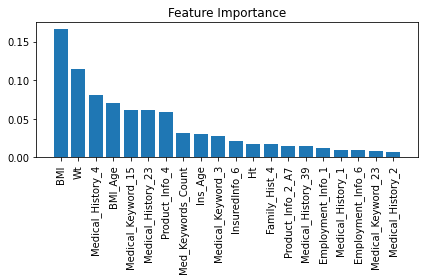

In [187]:
plt.title('Feature Importance')
plt.bar(hd_20['Colname'], hd_20['feature_imp'], align='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## SVR

In [188]:
from sklearn.svm import SVR
regressor = SVR(C=5,kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=5)

In [191]:
y_pred = regressor.predict(X_test)
y_pred

array([ 6.23171895,  5.88835222,  6.36314302,  6.73959721,  4.97520145,
        5.97397526,  5.90747871,  6.0947776 ,  6.46748153,  4.12217455,
        5.59290731,  6.00031903,  6.03169962,  6.38971764,  4.1287157 ,
        6.06101702,  5.70181402,  4.84381467,  5.6832026 ,  6.62619584,
        5.55018663,  4.69670742,  5.75788015,  5.88765477,  6.31044189,
        5.71986785,  2.56343839,  2.74078887,  4.7801352 ,  5.28588127,
        6.09844459,  6.67119056,  3.84893659,  4.918182  ,  4.18379573,
        5.27096429,  6.12969649,  5.48606031,  5.15801392,  5.89681779,
        5.68341437,  5.67563838,  6.06842003,  5.84058815,  6.01323374,
        5.53754292,  5.1344068 ,  5.81619154,  4.46225659,  3.27961433,
        6.1786541 ,  5.56489175,  3.90652134,  6.5150117 ,  6.65218326,
        5.39060162,  5.5088518 ,  2.49227346,  4.97560532,  6.36384754,
        5.65587637,  5.90278465,  3.5164627 ,  4.3692238 ,  4.78329191,
        4.83729626,  5.8943728 ,  6.0766082 ,  4.59911884,  6.18

In [192]:
y_pred_svr=np.round(y_pred).astype(int)

y_pred_svr[y_pred_svr<0]=0
y_pred_svr[y_pred_svr>7]=7

In [193]:
print(y_pred_svr)

[6 6 6 7 5 6 6 6 6 4 6 6 6 6 4 6 6 5 6 7 6 5 6 6 6 6 3 3 5 5 6 7 4 5 4 5 6
 5 5 6 6 6 6 6 6 6 5 6 4 3 6 6 4 7 7 5 6 2 5 6 6 6 4 4 5 5 6 6 5 6 7 6 7 4
 6 6 5 6 6 4 5 6 4 6 6 6 6 6 5 6 6 3 6 6 5 5 6 6 6 6 5 6 5 7 5 4 5 4 4 5 6
 5 6 4 4 6 5 6 3 5 5 5 5 6 6 5 6 5 5 3 6 6 6 6 6 6 5 6 4 4 5 4 5 6 6 3 6 5
 7 5 4 6 5 7 6 5 6 4 6 5 6 6 6 4 3 6 6 6 6 6 5 6 4 6 4 5 4 5 5 5 6 4 5 6 6
 4 5 4 5 5 4 5 6 5 6 4 5 5 4 5 4 4 7 6 6 5 4 6 6 5 5 5 6 6 5 5 7 7 5 6 6 5
 6 6 4 6 5 6 6 6 4 4 6 5 5 6 5 5 3 6 5 6 5 6 6 6 4 6 3 5 4 4 6 4 6 5 5 5 5
 4 4 6 5 6 6 6 5 6 5 6 4 5 5 7 4 6 5 6 5 5 6 5 5 6 6 5 6 6 4 4 6 7 6 5 6 5
 6 5 4 4 6 6 6 5 6 5 5 5 5 6 6 6 5 5 6 6 6 6 6 5 5 6 5 6 6 6 4 5 6 5 5 5 5
 5 6 4 6 6 4 6 6 5 6 5 5 5 6 6 6 6 6 3 6 6 5 5 6 6 6 6 4 6 6 6 5 7 6 3 5 5
 5 5 6 7 6 5 6 6 5 5 6 7 6 5 5 6 5 5 5 6 6 4 6 5 6 6 6 5 6 6 6 3 6 5 5 4 4
 5 6 6 6 6 6 5 4 6 5 4 6 5 5 6 6 6 6 5 3 5 5 6 6 5 6 6 5 6 6 4 6 6 6 4 5 6
 6 4 6 6 4 6 5 4 4 6 6 6 6 5 6 5 2 4 5 5 5 4 6 5 6 6 7 6 6 5 5 4 6 6 6 6 5
 6 4 7 6 7 5 5 6 6 6 6 6 

In [194]:
from sklearn.metrics import classification_report

print("Classification Report of test data:\n",classification_report(y_test, y_pred_svr ))

Classification Report of test data:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1241
           1       0.00      0.00      0.00      1310
           2       0.00      0.00      0.00       203
           3       0.01      0.01      0.01       286
           4       0.10      0.12      0.11      1086
           5       0.23      0.43      0.30      2247
           6       0.14      0.48      0.21      1606
           7       0.69      0.09      0.15      3898

    accuracy                           0.19     11877
   macro avg       0.27      0.14      0.10     11877
weighted avg       0.40      0.19      0.15     11877



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Comparing results

In [170]:
results = pd.DataFrame({
    'Model': ['Random Forest', 
              'XGBoost - Classifier',
             'SV Regressor'],
    'Train Accuracy %': [56.4,61,''],
    'Test Accuracy %': [50.5,54.5,23]
    
})
result_df = results.sort_values(by='Test Accuracy %', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Train Accuracy %,Test Accuracy %
Model,,
XGBoost - Classifier,61,54.5
Random Forest,56.4,50.5
SV Regressor,,23.0
